In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


So here's a list of questions we'll try to answer using our new data analysis skills!

1) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

2) What deck were the passengers on?

3) Where did the passengers come from?

4) Who was alone and who was with family?

5) What factors helped someone survive the sinking?


Question 1: Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
Let's look at the gender of the passengers:

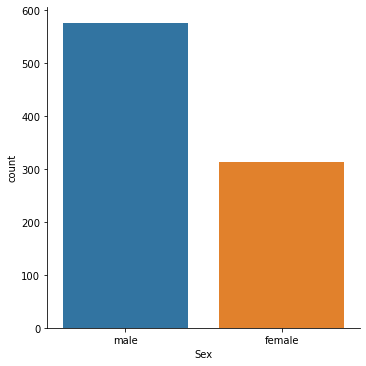

In [77]:
sns.catplot(x='Sex', data=titanic_df, kind="count")

It seems there were more male passengers than female! Now we go through the Pclass and gender together:

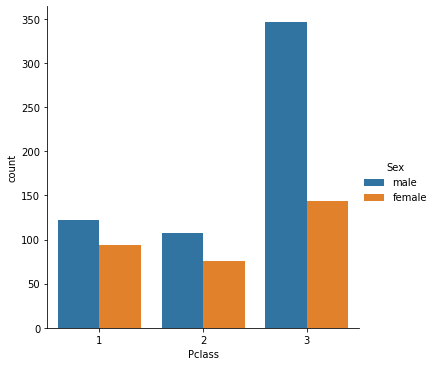

In [78]:
sns.catplot(x="Pclass", data=titanic_df, hue="Sex", kind="count")

So we can see there were more male in third class than female. So now let's divide people to man, woman and children. If we count the people under 16 as children we will have:

In [79]:
def adult(passenger):
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(adult, axis=1)

titanic_df[0:10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


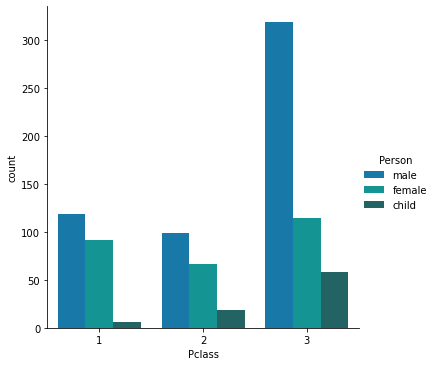

In [80]:
sns.catplot(x="Pclass", data=titanic_df, hue="Person", kind="count", palette='winter_d')

We can see that there are more children in third class and not so many in first class.Now let's look at the histogram of the age of the passengers:

<AxesSubplot:xlabel='Age', ylabel='Count'>

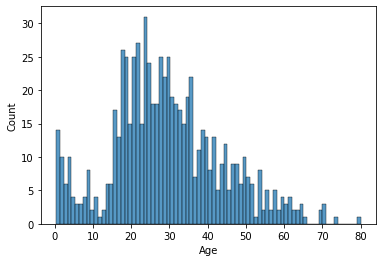

In [81]:
sns.histplot(titanic_df['Age'], bins= 80)

Most of the people aged between 20-30. Let's look at the age condidering the gender:

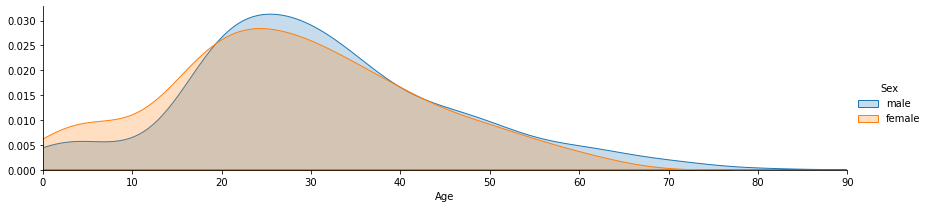

In [82]:
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,90))
fig.add_legend()

Now let's include the children in the graph:

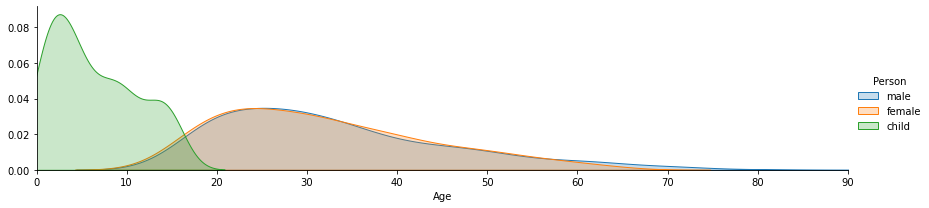

In [83]:
fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,90))
fig.add_legend()

Let's see the Pclass and age together:

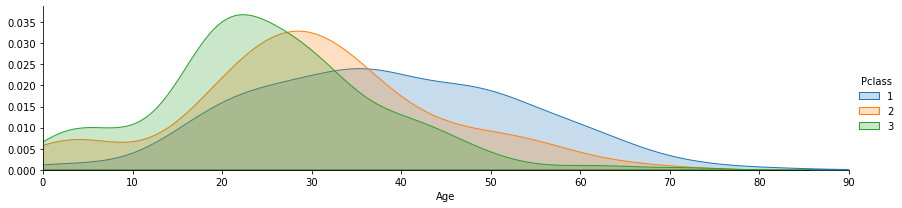

In [84]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,90))
fig.add_legend()

Wow! So it seems that first class had more older average of age.

Question 2: What deck were the passengers on?

In [85]:
titanic_df['Deck']=titanic_df['Cabin'].str[0]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN


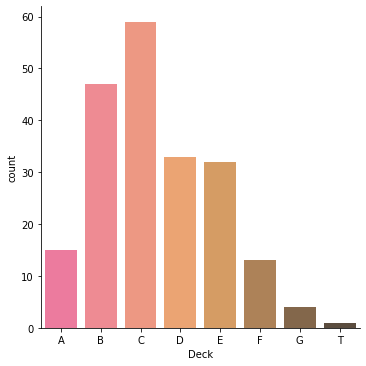

In [86]:
sns.catplot(x="Deck", data=titanic_df, kind="count", palette='spring_d', order=['A','B','C','D','E','F','G','T'])

We see a lot of people were in Deck C and B.

Question 3: Where did the passengers come from?
If we look at the project on Kaggle we see that these stand for Cherbourg, Queenstown, Southhampton.

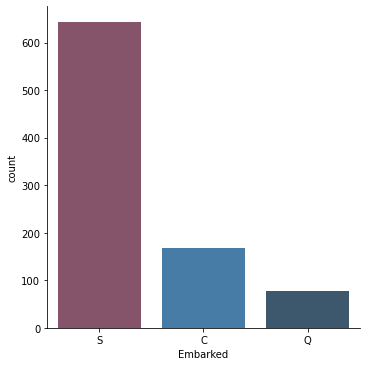

In [87]:
sns.catplot(x="Embarked", data=titanic_df, kind="count", palette='Set1_d')

We see a lot of people came from Southhampton. Let's see if they were in different Pclasses:

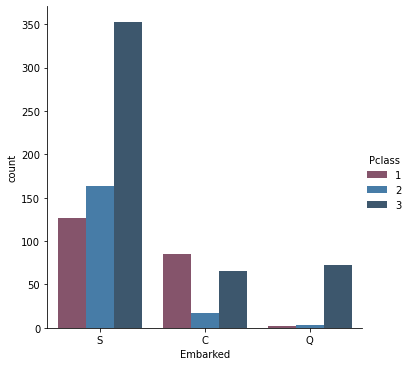

In [88]:
sns.catplot(x="Embarked", data=titanic_df, kind="count", hue='Pclass', palette='Set1_d')

Almost all people from Queenstown were in third class.

Question 4: Who was alone and who was with family?

In [90]:
titanic_df['Alone'] = (titanic_df['SibSp'] + titanic_df['Parch'] == 0)

def Alone_or_not (passenger):
    if passenger == True:
        return "Alone"
    if passenger == False:
        return "With Family"

titanic_df['Family'] = titanic_df['Alone'].apply(Alone_or_not)

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck,Alone,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,False,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,False,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,True,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,False,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,True,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,NaN,True,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E,True,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,NaN,False,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,NaN,False,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,NaN,False,With Family


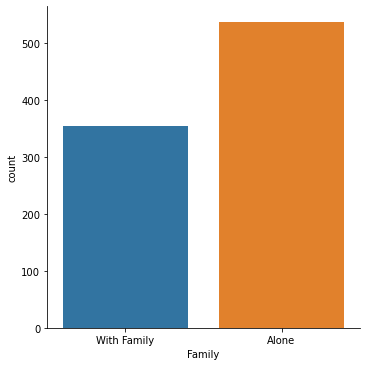

In [91]:
sns.catplot(x='Family', data=titanic_df, kind="count")

So it seems that most of the people were alone on the titanic.

Question 5: What factors helped someone survive the sinking?


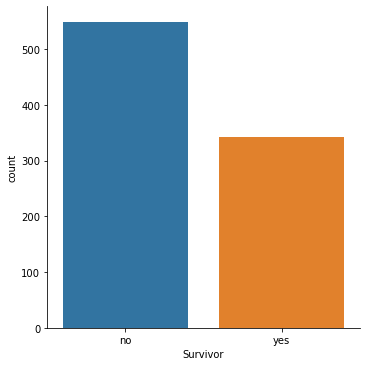

In [92]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})
sns.catplot(x='Survivor', data=titanic_df, kind="count")

Unfortunately many more people did not survive. Let's look at the factors: Pclass, gender, age, deck and being alone.

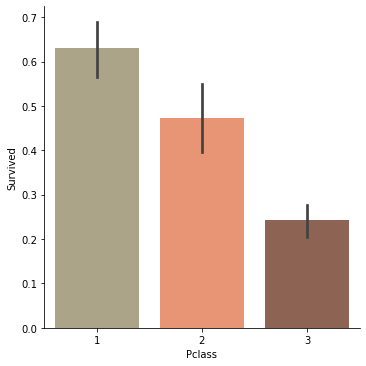

In [97]:
sns.catplot(x='Pclass',y='Survived',kind='bar', data=titanic_df, palette = 'Set2_d')

It seems that survival rate for the first class was more. 

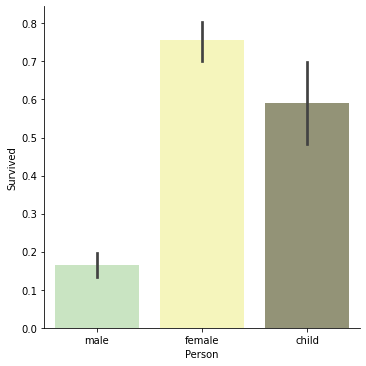

In [100]:
sns.catplot(x='Person',y='Survived',kind='bar', data=titanic_df, palette ='Set3_d')

They must have the "female and children go first" policy. Let's look at the effect of Pclass and gender together:

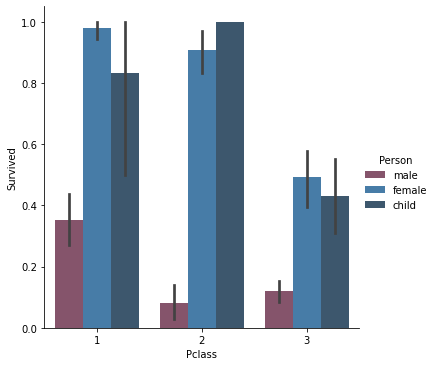

In [104]:
sns.catplot(x='Pclass',y='Survived',kind='bar', hue = 'Person' , data=titanic_df, palette ='Set1_d')

it looks like being a male or being in 3rd class were both not favourable for survival. But what about age?

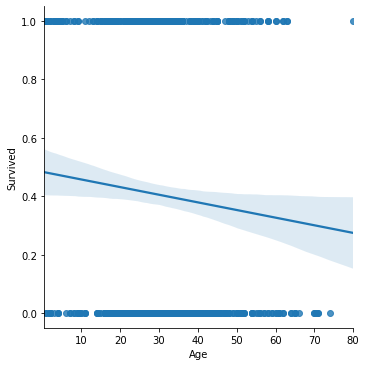

In [106]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

We can see that the younger people had more change of survival. Let's look at the effect of age and Pclass together:

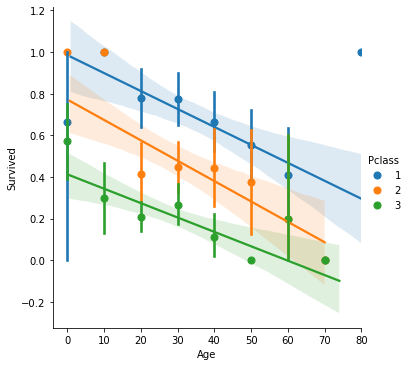

In [110]:
sns.lmplot(x='Age',y='Survived',data=titanic_df, hue='Pclass', x_bins=[0,10,20,30,40,50,60,70,80,90])

For sure being younger and being in the first class was more favorable for survival. What about if we relate gender and age with the survival set?

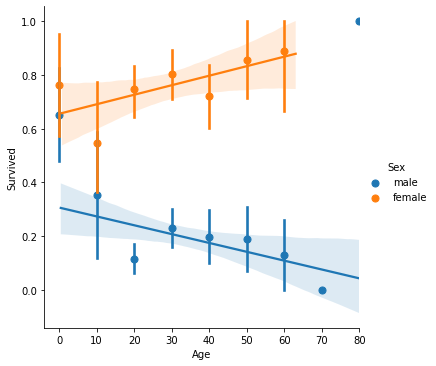

In [113]:
sns.lmplot(x='Age',y='Survived',data=titanic_df, hue='Sex', x_bins=[0,10,20,30,40,50,60,70,80,90])

It seems that being an old female gave the passengers more chance of survival than being an old male!
Did the deck have an effect on the passengers survival rate?

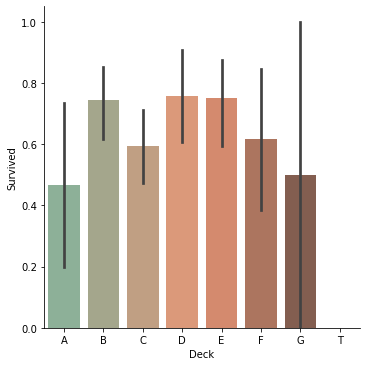

In [115]:
sns.catplot(x='Deck',y='Survived',kind='bar', data=titanic_df, palette ='Set2_d', order=['A','B','C','D','E','F','G','T'])

It seems that more people on deck B,D and E survived. Let's see if having a family member increase the odds of surviving the crash?

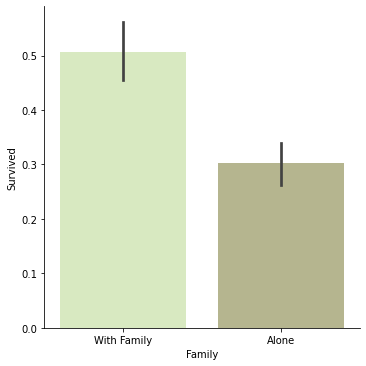

In [117]:
sns.catplot(x='Family',y='Survived',kind='bar', data=titanic_df, palette ='Set3_d')

It seems that people with faily survived more than alone people!